This dataset of Alphabet's stock price is real not dummy, the dataset is downloaded from finance.yahoo.com. 
And here we are predecting the Open price of stock

# Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout, LSTM, GRU
from tensorflow.compat.v1 import placeholder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Reading & Evaluation


In [3]:
dataset = pd.read_csv('/content/GOOG.csv')
dataset = dataset.drop(['Date'], axis=1)
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
0,56.996365,58.525631,56.562988,58.525631,58.525631,9517541
1,58.256641,60.572960,58.166977,59.457142,59.457142,10679279
2,59.681301,59.985161,58.535595,58.699978,58.699978,7263122
3,58.480801,59.611561,58.186901,58.968971,58.968971,7617245
4,59.198112,61.086037,58.291508,60.184414,60.184414,8576226


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4152 entries, 0 to 4151
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4152 non-null   float64
 1   High       4152 non-null   float64
 2   Low        4152 non-null   float64
 3   Close      4152 non-null   float64
 4   Adj Close  4152 non-null   float64
 5   Volume     4152 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 194.8 KB


In [5]:
dataset.isnull().sum()
#no null values present

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Data Visualization

No handles with labels found to put in legend.


[]

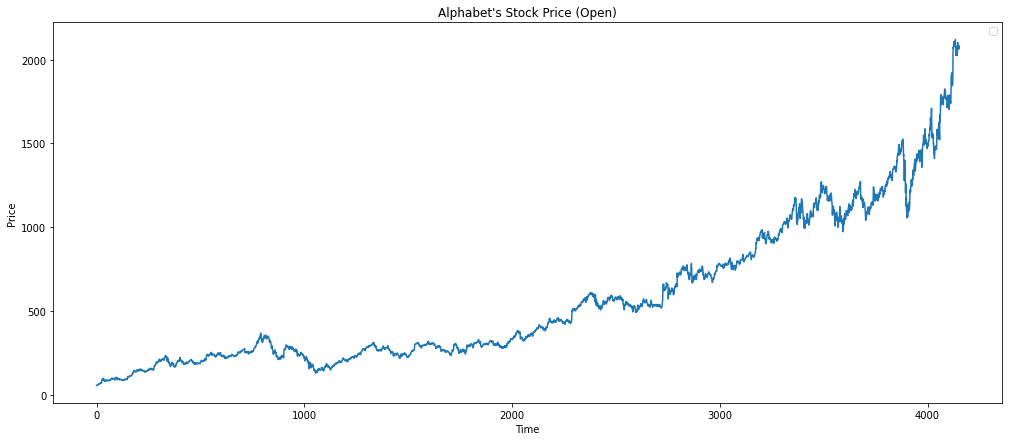

In [16]:
plt.rcParams["figure.figsize"] = (17,7)
plt.rcParams.update({'font.size': 10})
plt.title("Alphabet's Stock Price (Open)")
plt.plot(dataset['Open'])
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.plot()

# Train Dataset Preprocessing

In [ ]:
train = dataset[:3000]

In [ ]:
print(train.shape)
print(test.shape)

(3000, 6)
(1151, 6)


In [ ]:
print(train.head(3))
print(test.head(3))

        Open       High        Low      Close  Adj Close    Volume
0  56.996365  58.525631  56.562988  58.525631  58.525631   9517541
1  58.256641  60.572960  58.166977  59.457142  59.457142  10679279
2  59.681301  59.985161  58.535595  58.699978  58.699978   7263122
            Open        High         Low       Close   Adj Close  Volume
3000  777.320007  780.809998  773.530029  779.909973  779.909973  924200
3001  780.010010  782.859985  777.000000  777.500000  777.500000  719400
3002  775.000000  777.099976  773.130005  775.419983  775.419983  861500


In [ ]:
train = train.drop(['Adj Close'], axis=1)

In [ ]:
train.head()

,Open,High,Low,Close,Volume
0,56.996365,58.525631,56.562988,58.525631,9517541
1,58.256641,60.572960,58.166977,59.457142,10679279
2,59.681301,59.985161,58.535595,58.699978,7263122
3,58.480801,59.611561,58.186901,58.968971,7617245
4,59.198112,61.086037,58.291508,60.184414,8576226


In [ ]:
scaler = MinMaxScaler()
train_s = scaler.fit_transform(train)

# Creating Test Dataset

In [ ]:
X_train = []
y_train = []

for i in range(30, train_s.shape[0]):
  X_train.append(train_s[i-30 : i])
  y_train.append(train_s[i,0])

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(2970, 30, 5)
(2970,)


# Model Building

In [ ]:
model = Sequential()

model.add(LSTM(units = 30, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], 5)))

model.add(LSTM(units = 190, activation='relu', return_sequences=True))

model.add(LSTM(units = 120, activation='relu',return_sequences=True))

model.add(LSTM(units = 180, activation='relu'))
model.add(Dropout(0.2))

#Dense

model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(60, activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 30, 30)            4320      
_________________________________________________________________
lstm_17 (LSTM)               (None, 30, 190)           167960    
_________________________________________________________________
lstm_18 (LSTM)               (None, 30, 120)           149280    
_________________________________________________________________
lstm_19 (LSTM)               (None, 180)               216720    
_________________________________________________________________
dropout_12 (Dropout)         (None, 180)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 80)                14480     
_________________________________________________________________
dropout_13 (Dropout)         (None, 80)               

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# Model Training

In [ ]:
r = model.fit(X_train, y_train, epochs=40, batch_size=30, callbacks=[callback])

Epoch 1/40
99/99 [==============================] - 9s 64ms/step - loss: 0.0579
Epoch 2/40
99/99 [==============================] - 7s 66ms/step - loss: 0.0053
Epoch 3/40
99/99 [==============================] - 7s 71ms/step - loss: 0.0048
Epoch 4/40
99/99 [==============================] - 7s 72ms/step - loss: 0.0041
Epoch 5/40
99/99 [==============================] - 7s 66ms/step - loss: 0.0045
Epoch 6/40
99/99 [==============================] - 7s 66ms/step - loss: 0.0035
Epoch 7/40
99/99 [==============================] - 7s 69ms/step - loss: 0.0028
Epoch 8/40
99/99 [==============================] - 7s 72ms/step - loss: 0.0031
Epoch 9/40
99/99 [==============================] - 6s 65ms/step - loss: 0.0030
Epoch 10/40
99/99 [==============================] - 7s 70ms/step - loss: 0.0025
Epoch 11/40
99/99 [==============================] - 7s 70ms/step - loss: 0.0026
Epoch 12/40
99/99 [==============================] - 6s 62ms/step - loss: 0.0023
Epoch 13/40
99/99 [==================

# Model Loss

[]

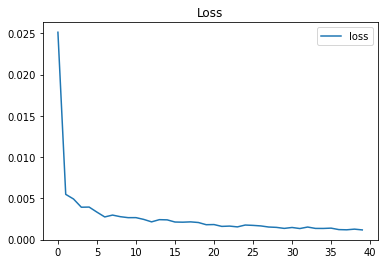

In [ ]:
plt.title('Loss')
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.plot()

# Test Dataset Preprocessing

In [ ]:
test = dataset[3000:-1]
test = test.drop(['Adj Close'], axis=1)

In [ ]:
test.head()

,Open,High,Low,Close,Volume
3000,777.320007,780.809998,773.530029,779.909973,924200
3001,780.010010,782.859985,777.000000,777.500000,719400
3002,775.000000,777.099976,773.130005,775.419983,861500
3003,773.270020,774.539978,770.049988,772.150024,951400
3004,775.479980,776.440002,771.784973,772.080017,928200


In [ ]:
train.tail(60)

,Open,High,Low,Close,Adj Close,Volume
2940,706.530029,711.478027,704.179993,704.239990,704.239990,1330700
2941,706.859985,720.969971,706.859985,720.090027,720.090027,1929500
2942,720.760010,727.510010,719.705017,725.270020,725.270020,1629200
2943,722.869995,728.330017,720.280029,724.119995,724.119995,1576300
2944,724.010010,733.935974,724.000000,732.659973,732.659973,1975000
2945,731.739990,739.729980,731.260010,735.719971,735.719971,2129500
2946,734.530029,737.210022,730.659973,734.150024,734.150024,1253600
2947,732.500000,733.020020,724.169983,730.400024,730.400024,1341800
2948,729.270020,729.489990,720.559998,722.340027,722.340027,1226300
2949,724.909973,724.909973,714.609985,716.549988,716.549988,1565300


In [ ]:
#looking back 60 days
past_60_days =  train.tail(30)

In [ ]:
df = past_60_days.append(test, ignore_index=True)

In [ ]:
df = df.drop(['Adj Close'], axis=1)

In [ ]:
df.head()

,Open,High,Low,Close,Volume
0,689.979980,701.679993,689.090027,697.770020,1411900
1,698.080017,698.200012,688.215027,695.359985,1304200
2,699.500000,705.710022,696.434998,705.630005,1575200
3,708.049988,716.510010,707.239990,715.090027,1111800
4,719.119995,722.940002,715.909973,720.640015,1336900


In [ ]:
#scaling the data
test_s = scaler.transform(df)
test_s

array([[0.86947865, 0.87941385, 0.87076123, 0.88010872, 0.01701096],
       [0.88060502, 0.87465551, 0.86955667, 0.87679059, 0.01570604],
       [0.88255553, 0.88492429, 0.8808726 , 0.89093031, 0.01898955],
       ...,
       [2.77067805, 2.8265403 , 2.77505165, 2.83102777, 0.01490758],
       [2.78570537, 2.77808168, 2.74086994, 2.758264  , 0.02080457],
       [2.75452427, 2.74635934, 2.73530826, 2.76455605, 0.01563213]])

# Creating Test Dataset

In [ ]:
X_test = []
y_test = []

for i in range(30, test_s.shape[0]):
  X_test.append(test_s[i-30 : i])
  y_test.append(test_s[i,0])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
X_test.shape, y_test.shape

((1151, 30, 5), (1151,))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.shape

(1151, 1)

In [ ]:
scaler.scale_

array([1.37361951e-03, 1.36734492e-03, 1.37663875e-03, 1.37679538e-03,
       1.21162615e-08])

In [ ]:
scale = 1/1.33197958e-03
scale

750.762260184199

In [ ]:
y_pred = y_pred * scale
y_test = y_test * scale

In [ ]:
y_pred.shape, y_test.shape

((1151, 1), (1151,))

# Making Prediction

[]

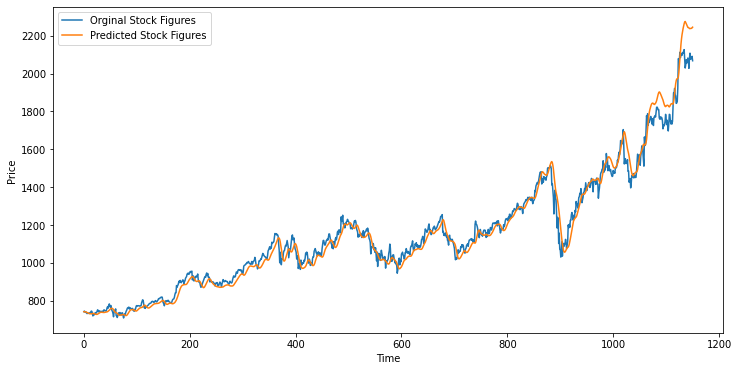

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams.update({'font.size': 10})
plt.plot(y_test, label='Orginal Stock Figures')
plt.plot(y_pred, label='Predicted Stock Figures')
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()
plt.plot()


# Saving The Model

In [ ]:
#saving the model
model.save('alphabet_or_google.h5')

# Model Evaluation

##Root Mean Squared Error

In [ ]:
 from sklearn.metrics import mean_squared_error

In [ ]:
rms = mean_squared_error(y_test, y_pred, squared=False)
print('The Root Mean Squared Error is {}'.format(rms))

The Root Mean Squared Error is 48.83074892533447


## R2 Score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)
print('The R2 score is {}'.format(r2))

The R2 score is 0.973969995368543
